In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import modules and utilities

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%cd '/content/drive/MyDrive/Colab Notebooks/media-agenda'
import util
from util import DocType, Source, OptimalKClustersConfig

/content/drive/.shortcut-targets-by-id/1jko4SIvsKFTxv155O0DV1wHZ_jS75VfX/Colab Notebooks/media-agenda
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## k = 15

In [3]:
metadata_file = '/content/drive/MyDrive/Colab Notebooks/media-agenda/data/sentence_cluster_sentiment_dict_with_cosine_similarity_for_15_clusters.csv'
# sid_file = '/content/drive/MyDrive/Colab Notebooks/media-agenda/data/desired_sentence_ids.npy'
rsfile = '/content/drive/My Drive/Colab Notebooks/media-agenda/data/revised_all_sentences_str.json'
# rifile = '/content/drive/My Drive/Colab Notebooks/media-agenda/data/revised_all_sentences_ind.json'
# centroid_file = '/content/drive/My Drive/Colab Notebooks/media-agenda/data/centroids_for_15_clusters.npy'

%cd '/content/drive/MyDrive/Colab Notebooks/media-agenda/data'

/content/drive/.shortcut-targets-by-id/1jko4SIvsKFTxv155O0DV1wHZ_jS75VfX/Colab Notebooks/media-agenda/data


In [4]:
# load all sentences
all_sentences = np.array(util.load_sentences(rsfile))

# load sentences assignement as dataframe
# df = pd.read_json(metadata_file)
df = pd.read_csv(metadata_file)
print('Loaded sentence assigments: ', df.shape[0])
display(df.head())

Sentences file - loaded
Done - appended all sentences
Number of tokenized sentences from corpus: 353786
Loaded sentence assigments:  328091


,Unnamed: 0,sentence_id,source,article_id,comment_id,posting_time,cluster,sentiw_sentiment,textblob_polarity,textblob_subjectivity,cosine_similarity
0,0,0,nytimes,0,-1,2005-11-01 00:00:00,1,0.12500,-0.017045,0.518182,0.318689
1,1,1,nytimes,0,-1,2005-11-01 00:00:00,1,-0.12500,0.337500,0.675000,0.396096
2,2,2,nytimes,0,-1,2005-11-01 00:00:00,3,0.07500,0.085714,0.192857,0.537876
3,3,3,nytimes,0,-1,2005-11-01 00:00:00,1,0.50000,0.025000,0.250000,0.433355
4,4,4,nytimes,0,-1,2005-11-01 00:00:00,1,-0.03125,-0.050000,0.291667,0.384546


In [5]:
cluster_label_for_15 = ['Planting and gardening: {pesticid, plant, pflanz, pestizid}', 'Retail', 'Garbage: {http, www, http, de}', 'GMO label and bio-products',
                        'Garbage: {www, articl, sysop, michaelis}', 'Taste and food', 'Chemicals and cancer: {cancer, chemic, bodi, dioxin}', 'Genetic research', 
                        'Health and diet', 'Garbage: {thank, here, all, mich}', 'Governance and public policy', 'Meat and animal feeding', 
                        'Agriculture', 'Price and consumption', 'Garbage: {articl, question, verscharft, tragt}']

top = 10

top_sentences = []

all_sentences_df = pd.DataFrame({'sentence_id': range(len(all_sentences)),
                                 'sentence': all_sentences})

for i in range(OptimalKClustersConfig.k_with_garbage):
  en_cluster_df = df[(df.cluster == i) & (df.source.isin([Source.NYTIMES, Source.QUORA]))].sort_values(by = 'cosine_similarity', ascending = False)
  de_cluster_df = df[(df.cluster == i) & (df.source == Source.SPIEGEL)].sort_values(by = 'cosine_similarity', ascending = False)

  en_cluster_df = en_cluster_df.head(top * 8).merge(all_sentences_df, how = 'left', on = 'sentence_id', validate = 'one_to_one')
  de_cluster_df = de_cluster_df.head(top * 8).merge(all_sentences_df, how = 'left', on = 'sentence_id', validate = 'one_to_one')

  en_cluster_df = en_cluster_df[['cosine_similarity', 'sentence']].drop_duplicates()
  de_cluster_df = de_cluster_df[['cosine_similarity', 'sentence']].drop_duplicates()

  en_sentences = en_cluster_df.head(top).sentence.values
  de_sentences = de_cluster_df.head(top).sentence.values

  en_cos_similarity = en_cluster_df.head(top).cosine_similarity.values
  de_cos_similarity = de_cluster_df.head(top).cosine_similarity.values

  # en_sentences = all_sentences[en_sid]
  # de_sentences = all_sentences[de_sid]

  for j, cos, s in zip(range(1, top + 1), en_cos_similarity, en_sentences):
    top_sentences.append(('en', i, cluster_label_for_15[i], j, cos, s))
  
  for j, cos, s in zip(range(1, top + 1), de_cos_similarity, de_sentences):
    top_sentences.append(('de', i, cluster_label_for_15[i], j, cos, s))

top_sentences_df = pd.DataFrame(top_sentences, columns = ['language', 'cluster', 'topic', 'order', 'cosine_similarity', 'sentence'])
pd.set_option('display.max_rows', None, 'display.max_colwidth', None)
display(top_sentences_df)

,language,cluster,topic,order,cosine_similarity,sentence
0,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",1,0.622546,"Usually, the plant which uses conventional farming will produce the residue of the pesticides."
1,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",2,0.618826,"Some pesticides used in conventional farming, however, may reduce the level of resveratrol in plants."
2,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",3,0.612566,"Also, there is the question of naturally occurring pesticides produced by the plant itself."
3,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",4,0.611673,Genetically modified plants can also be designed to lessen pesticide use.
4,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",5,0.611532,Plants that are genetically modified are usually modified so they do not need that much pesticides.
5,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",6,0.611516,"To be clear, organic farmers do use less synthetic pesticides (they are still allowed to use certain synthetic pesticides)."
6,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",7,0.611003,"Indeed, large and frequent applications of pesticides are required to protect the plant from insects and disease."
7,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",8,0.610344,Most of the pesticides we eat are naturally occurring in the plant itself.
8,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",9,0.610051,"In any case, organic-approved pesticides definitely leave residues on treated crops by the time they reach the consumer."
9,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",10,0.609698,Organically grown produce is grown from non-GMO seeds without the use of pesticides or chemical fertilizers.


In [6]:
cluster_label_for_15 = ['Planting and gardening: {pesticid, plant, pflanz, pestizid}', 'Retail', 'Garbage: {http, www, http, de}', 'GMO label and bio-products',
                        'Garbage: {www, articl, sysop, michaelis}', 'Taste and food', 'Chemicals and cancer: {cancer, chemic, bodi, dioxin}', 'Genetic research', 
                        'Health and diet', 'Garbage: {thank, here, all, mich}', 'Governance and public policy', 'Meat and animal feeding', 
                        'Agriculture', 'Price and consumption', 'Garbage: {articl, question, verscharft, tragt}']

top = 10

top_sentences = []

all_sentences_df = pd.DataFrame({'sentence_id': range(len(all_sentences)),
                                 'sentence': all_sentences})

for i in range(OptimalKClustersConfig.k_with_garbage):
  en_cluster_df = df[(df.cluster == i) & (df.source.isin([Source.NYTIMES, Source.QUORA]))].sort_values(by = 'cosine_similarity', ascending = True)
  de_cluster_df = df[(df.cluster == i) & (df.source == Source.SPIEGEL)].sort_values(by = 'cosine_similarity', ascending = True)

  en_cluster_df = en_cluster_df.head(top * 8).merge(all_sentences_df, how = 'left', on = 'sentence_id', validate = 'one_to_one')
  de_cluster_df = de_cluster_df.head(top * 8).merge(all_sentences_df, how = 'left', on = 'sentence_id', validate = 'one_to_one')

  en_cluster_df = en_cluster_df[['cosine_similarity', 'sentence']].drop_duplicates()
  de_cluster_df = de_cluster_df[['cosine_similarity', 'sentence']].drop_duplicates()

  en_sentences = en_cluster_df.head(top).sentence.values
  de_sentences = de_cluster_df.head(top).sentence.values

  en_cos_similarity = en_cluster_df.head(top).cosine_similarity.values
  de_cos_similarity = de_cluster_df.head(top).cosine_similarity.values

  # en_sentences = all_sentences[en_sid]
  # de_sentences = all_sentences[de_sid]

  for j, cos, s in zip(range(1, top + 1), en_cos_similarity, en_sentences):
    top_sentences.append(('en', i, cluster_label_for_15[i], j, cos, s))
  
  for j, cos, s in zip(range(1, top + 1), de_cos_similarity, de_sentences):
    top_sentences.append(('de', i, cluster_label_for_15[i], j, cos, s))

top_sentences_df = pd.DataFrame(top_sentences, columns = ['language', 'cluster', 'topic', 'order', 'cosine_similarity', 'sentence'])
pd.set_option('display.max_rows', None, 'display.max_colwidth', None)
display(top_sentences_df)

,language,cluster,topic,order,cosine_similarity,sentence
0,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",1,0.199300,What kind of growth hack are you referring to?
1,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",2,0.230110,"How It Works: Poisons the insect, causing a quick deathPros: Quick acting."
2,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",3,0.233750,You should use insect screen on your ventilation system components such as intake shutters and exhaust fans.
3,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",4,0.234790,How much damage can one caterpillar do?
4,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",5,0.235921,"While in the home decoration industry, the environmentally friendly home decor product are more popular than traditional wall paintings ."
5,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",6,0.237833,Is it even deniable that Cali is in the middle of an epic drought?
6,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",7,0.238581,You think those bugs stay away out of respect?
7,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",8,0.240394,I have about 15 pots on a balcony which is about 6x12 feet.
8,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",9,0.241819,You cannot just reboot a growing season.
9,en,0,"Planting and gardening: {pesticid, plant, pflanz, pestizid}",10,0.242555,There is NO need to use DAP on a properly managed pasture.


## For other k

In [ ]:
import json

# load all sentences
rsfile = '/content/drive/My Drive/Colab Notebooks/media-agenda/data/revised_all_sentences_str.json'
all_sentences = np.array(util.load_sentences(rsfile))
all_sentences_df = pd.DataFrame({'sentence_id': range(len(all_sentences)),
                                 'sentence': all_sentences})

# load sentences metadata
smfile = '/content/drive/My Drive/Colab Notebooks/media-agenda/data/sentence_cluster_dict.json'
# with open(smfile, 'r') as f:
#   loaded_data = json.load(f)
#   print('Number of sentence metadata:', len(loaded_data))
df = pd.read_json(smfile)
df.head()

Sentences file - loaded
Done - appended all sentences
Number of tokenized sentences from corpus: 353786


,sentence_id,source,article_id,comment_id,posting_time,cluster
0,0,nytimes,0,-1,2005-11-01,1
1,1,nytimes,0,-1,2005-11-01,1
2,2,nytimes,0,-1,2005-11-01,3
3,3,nytimes,0,-1,2005-11-01,1
4,4,nytimes,0,-1,2005-11-01,1


In [ ]:
def show_cosine_similarity_boxplot(K, cosine_similarities, labels):
  df = pd.DataFrame({'cos_similarity': cosine_similarities, 
                    'cluster': labels})

  x = []
  medians = []
  positions = []

  for k in K:
    values = df[df.cluster == k].cos_similarity.values
    x.append(values)
    medians.append(np.median(values))
  sorted_medians = np.sort(medians)

  for item in medians:
    positions.append(np.argwhere(sorted_medians == item).flatten()[0])

  # is_normal_topic = np.char.find(cluster_label_for_15, 'Garbage').astype(bool)
  # colors = ['white' if (i == True) else 'gray' for i in is_normal_topic]

  # plt.boxplot(x, positions = None, vert = False, labels = cluster_label_for_15)
  # plt.xlim(0, 1)
  # plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
  # plt.show()

  bplot = plt.boxplot(x, positions = positions, vert = False, labels = K,
              patch_artist = True,
              flierprops = dict(marker = 'o', markersize = 1, markeredgecolor = 'gray'),
              medianprops = dict(color = 'purple'))
  plt.xlim(0, 1)
  plt.xlabel('Cosine Similarity')
  plt.tick_params(axis = 'y', which = 'major', length = 0, pad = 8, labelleft = False, labelright = True, direction = 'out')
  # for patch, color in zip(bplot['boxes'], colors):
  #     patch.set_facecolor(color)
  plt.show()

In [ ]:
def get_cosine_similarity(label_file = '15_kmean_labels.npy', show_cosine_similarity_plot = True):
  directory = '/content/drive/MyDrive/Colab Notebooks/media-agenda/refactorization/data/kmean-result-backup/'
  labels = np.load(directory + label_file)

  en_embeddings = np.load('/content/drive/MyDrive/Colab Notebooks/media-agenda/refactorization/data/en_embeddings.npy')
  de_embeddings = np.load('/content/drive/MyDrive/Colab Notebooks/media-agenda/refactorization/data/de_embeddings.npy')
  all_embeddings = np.concatenate((en_embeddings, de_embeddings), axis=0)
  assert labels.shape[0] == all_embeddings.shape[0]
  print('Number of sentence embeddings:', all_embeddings.shape)

  K = np.unique(labels)

  centroids = []
  for i in K:
    indeces_for_cluster_i = np.argwhere(labels == i).squeeze()
    embeddings_for_cluster_i = all_embeddings[indeces_for_cluster_i].squeeze()

    print('Cluster', i, ' Number of sentences:', len(indeces_for_cluster_i))

    centroid = np.mean(embeddings_for_cluster_i, axis = 0)
    centroids.append(centroid)
  centroids = np.array(centroids).squeeze()
  print('Shape of centroids:', centroids.shape)

  cosine_similarities = []
  for embedding, cluster_label in zip(all_embeddings, labels):
    similarity_score = np.dot(embedding, centroids[cluster_label])
    cosine_similarities.append(similarity_score)

  # %cd '/content/drive/MyDrive/Colab Notebooks/media-agenda/data/'
  # np.save('centroids_for_' + str(k) + '_clusters.npy', centroids)
  # pd.DataFrame(cosine_similarities).to_csv('cosine_similarities_for_' + str(k) + '_clusters.csv')

  if show_cosine_similarity_plot == True:
    show_cosine_similarity_boxplot(K, cosine_similarities, labels)

  return K, labels, centroids, cosine_similarities


In [ ]:
def print_top_sentences(K, metadata_df, labels, cosine_similarities, all_sentences_df, ascending = False):

  df = pd.DataFrame({'sentence_id': metadata_df.sentence_id.values,
                     'source': metadata_df.source.values,
                     'cluster': labels,
                     'cosine_similarity': cosine_similarities})

  top = 10
  top_sentences = []

  for i in K:
    en_cluster_df = df[(df.cluster == i) & (df.source.isin([Source.NYTIMES, Source.QUORA]))].sort_values(by = 'cosine_similarity', ascending = ascending)
    de_cluster_df = df[(df.cluster == i) & (df.source == Source.SPIEGEL)].sort_values(by = 'cosine_similarity', ascending = ascending)

    en_cluster_df = en_cluster_df.head(top * 10).merge(all_sentences_df, how = 'left', on = 'sentence_id', validate = 'one_to_one')
    de_cluster_df = de_cluster_df.head(top * 10).merge(all_sentences_df, how = 'left', on = 'sentence_id', validate = 'one_to_one')

    en_cluster_df = en_cluster_df[['cosine_similarity', 'sentence']].drop_duplicates()
    de_cluster_df = de_cluster_df[['cosine_similarity', 'sentence']].drop_duplicates()

    en_sentences = en_cluster_df.head(top).sentence.values
    de_sentences = de_cluster_df.head(top).sentence.values

    en_cos_similarity = en_cluster_df.head(top).cosine_similarity.values
    de_cos_similarity = de_cluster_df.head(top).cosine_similarity.values

    # en_sentences = all_sentences[en_sid]
    # de_sentences = all_sentences[de_sid]

    for j, cos, s in zip(range(1, top + 1), en_cos_similarity, en_sentences):
      top_sentences.append(('en', i, j, cos, s))
    
    for j, cos, s in zip(range(1, top + 1), de_cos_similarity, de_sentences):
      top_sentences.append(('de', i, j, cos, s))

  top_sentences_df = pd.DataFrame(top_sentences, columns = ['language', 'cluster', 'order', 'cosine_similarity', 'sentence'])
  pd.set_option('display.max_rows', None, 'display.max_colwidth', None)
  display(top_sentences_df)

### k = 5

Number of sentence embeddings: (328091, 512)
Cluster 0  Number of sentences: 76923
Cluster 1  Number of sentences: 18383
Cluster 2  Number of sentences: 59439
Cluster 3  Number of sentences: 97366
Cluster 4  Number of sentences: 75980
Shape of centroids: (5, 512)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


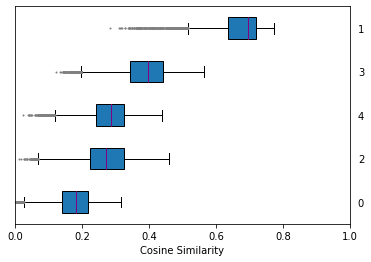

In [ ]:
K, labels, centroids, cosine_similarities = get_cosine_similarity(label_file = '5_kmean_labels.npy')
assert df.shape[0] == len(labels) == len(cosine_similarities)

In [ ]:
print_top_sentences(K, df, labels, cosine_similarities, all_sentences_df)

,language,cluster,order,cosine_similarity,sentence
0,en,0,1,0.299364,We full well know that the industry in all of its glory takes precedence over the concerns or welfare of the people of this country.
1,en,0,2,0.290433,Businesses have been know in the past to acquiesce to consumer demand.
2,en,0,3,0.290230,"""Excess"" profits are always short lived unless government enforced."
3,en,0,4,0.289653,"There are more that ""government regulators"" involved."
4,en,0,5,0.284852,I’m quite sure the basic economic law of supply and demand would prevail.
5,en,0,6,0.283321,"As long as the majority of studies that the government uses are done by the corporations that are selling these products, the process will remain corrupt and unreliable."
6,en,0,7,0.283289,"Another is that such policies don’t cover all products on the market, leaving many consumers - often those buying at lower prices - without comparable protection."
7,en,0,8,0.282810,Incidently - I do see signs of this shift in attitude toward more sustainable practices.
8,en,0,9,0.282353,"If one followed the money trail, they would likely find the resources come from the same Big Ag companies attempting to usurp the will of we the consumer."
9,en,0,10,0.282294,All of which assumes that consumers will clamor for the results of such efforts - not despite the economy but because of it.


### k = 10

Number of sentence embeddings: (328091, 512)
Cluster 0  Number of sentences: 35773
Cluster 1  Number of sentences: 18268
Cluster 2  Number of sentences: 42382
Cluster 3  Number of sentences: 38300
Cluster 4  Number of sentences: 31827
Cluster 5  Number of sentences: 28107
Cluster 6  Number of sentences: 38625
Cluster 7  Number of sentences: 27275
Cluster 8  Number of sentences: 31772
Cluster 9  Number of sentences: 35762
Shape of centroids: (10, 512)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


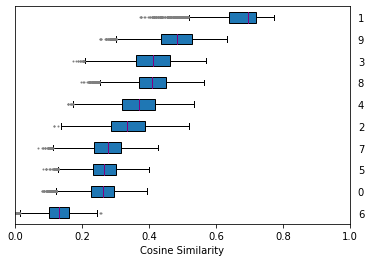

In [ ]:
K, labels, centroids, cosine_similarities = get_cosine_similarity(label_file = '10_kmean_labels.npy')
assert df.shape[0] == len(labels) == len(cosine_similarities)

In [ ]:
print_top_sentences(K, df, labels, cosine_similarities, all_sentences_df)

,language,cluster,order,cosine_similarity,sentence
0,en,0,1,0.387616,The vegetables taste much better than what I can get at the supermarket.
1,en,0,2,0.385319,"What you get with these are veggies which have been soaked in vinegar, a little salt, preservatives (B.H.T."
2,en,0,3,0.385028,"Fruit and veggies can be prepped (sliced, peeled) and frozen until use."
3,en,0,4,0.383237,It tastes totally different from your normal vegetables.
4,en,0,5,0.380856,"Small-batch flour can vary from season to season, farm to farm and even field to field, with different gluten content, flavor or levels of water absorption."
5,en,0,6,0.377428,"Same with brussel sprouts, strawberries, potatos,etc."
6,en,0,7,0.375572,"It can also be mixed in with the other foods (milk and fruit, oats/rice cooked in milk)."
7,en,0,8,0.374541,"Brussels sprouts are also packed with vitamins C and K as well as fiber, potassium and omega-3 fatty acids."
8,en,0,9,0.374507,"We use these foods in moderation, as well."
9,en,0,10,0.374389,Products made from whole corn meal are also quite good.


### k = 20

Number of sentence embeddings: (328091, 512)
Cluster 0  Number of sentences: 21756
Cluster 1  Number of sentences: 11854
Cluster 2  Number of sentences: 18232
Cluster 3  Number of sentences: 23669
Cluster 4  Number of sentences: 11124
Cluster 5  Number of sentences: 16111
Cluster 6  Number of sentences: 16040
Cluster 7  Number of sentences: 15123
Cluster 8  Number of sentences: 17467
Cluster 9  Number of sentences: 11127
Cluster 10  Number of sentences: 15197
Cluster 11  Number of sentences: 14655
Cluster 12  Number of sentences: 13116
Cluster 13  Number of sentences: 21805
Cluster 14  Number of sentences: 22902
Cluster 15  Number of sentences: 13610
Cluster 16  Number of sentences: 16987
Cluster 17  Number of sentences: 13410
Cluster 18  Number of sentences: 18439
Cluster 19  Number of sentences: 15467
Shape of centroids: (20, 512)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


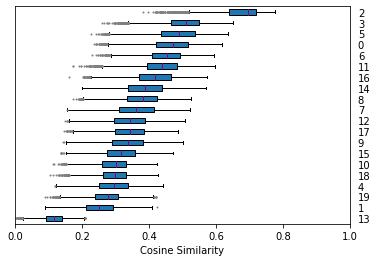

In [ ]:
K, labels, centroids, cosine_similarities = get_cosine_similarity(label_file = '20_kmean_labels.npy')
assert df.shape[0] == len(labels) == len(cosine_similarities)

In [ ]:
print_top_sentences(K, df, labels, cosine_similarities, all_sentences_df)

,language,cluster,order,cosine_similarity,sentence
0,en,0,1,0.617323,"Regardless of capacity the modern crops still need more and more land to feed the more and more people, even if the inefficiencies and failures of corporate agriculture are overcome."
1,en,0,2,0.614346,"The main problem in organic farming is the availability of adequate organic sources of nutrients (crop residues, composts, manures) to supply crops with all the required nutrients and to maintain soil health."
2,en,0,3,0.611862,"In order to grow organic food with high yields, farmers have to follow best agricultural management practices to make efficient use of local natural resources."
3,en,0,4,0.606251,"The amount of land devoted to organic farming has grown, according to the Agriculture Department, but not nearly enough to address growing consumer demand."
4,en,0,5,0.606076,"Organic farming does not achieve the same yields as more modern farming techniques, so more land is used to grow the same amount of food."
5,en,0,6,0.604855,"Roughly speaking, conventional farmers have incentive to do what is profitable over some time frame, whereas the main governing principle of modern organic is avoiding synthetics."
6,en,0,7,0.604577,The main benefit to raising crops organically is not that they produce is more healthful but that the sustainable methods of organic agriculture keep the soil healthier.
7,en,0,8,0.604438,"Not only does organic farming have benefits for the environment, but there are also direct benefits to the farmers and farmworkers who grow organic produce."
8,en,0,9,0.604389,"Where modern farming seeks to increase yield and remove pesticide (for economic reasons, if nothing else), organic farming has no such goals."
9,en,0,10,0.604254,"Advantages of organic farming is to save eco system, produce pesticide free crops and earn good money as compared with conventional farming."
